# Denoising a Signal using the FFT

***

## References:

***

[1]: [*Denoising Data with FFT;* Steve Brunton; YouTube; April 2020;](https://youtu.be/s2K1JfNR7Sc)

[2]: [*Machine Learning, Dynamical Systems and Control;* Brunton and Kutz; 2019;](http://databookuw.com/page-2/page-21/)

[3]: [*Clean Up Data Noise with Fourier Transform in Python;* Andrew Zhu; October 2021;](https://towardsdatascience.com/clean-up-data-noise-with-fourier-transform-in-python-7480252fd9c9)

[4]: [*Fourier Transform;* Techopedia; November 2020;](https://www.techopedia.com/definition/7292/fourier-transform)

[5]: [*How to Calculate the Power Spectral Density (PSD) for Vibration Analysis;* Steve Hanly;](https://blog.endaq.com/calculate-power-spectral-density-using-the-endaq-open-source-python-library)

## Preliminaries

***

In [39]:
# Numercial arrays.
import numpy as np

# Plots.
import matplotlib.pyplot as plt

In [40]:
# Colours for plots.
atu_colours = {
  'navy': np.array([0,26,121]) / 255.0,
  'teal': np.array([123,185,203]) / 255.0,
  'green': np.array([0,91,94]) / 255.0,
  'sand': np.array([255,232,212]) / 255.0,
  'orange': np.array([255,121,30]) / 255.0,
  'yellow': np.array([248,255,142]) / 255.0,
  'lightgreen': np.array([172,245,189]) / 255.0,
  'warmgrey': np.array([200,190,191]) / 255.0,
  'purple': np.array([77,8,87]) / 255.0,
}

In [41]:
# Keep track of the plot number.
plot_no = 0

## Generating Sine Waves

***

In [42]:
# Time step for discrete wave.
dt = 0.0001

# Array of time steps.
t = np.arange(0.0, 0.1, dt)

In [43]:
# Frequency of wave.
freq_1 = 60.0

# Generate wave.
f_1 = np.sin(2.0 * np.pi * freq_1 * t)

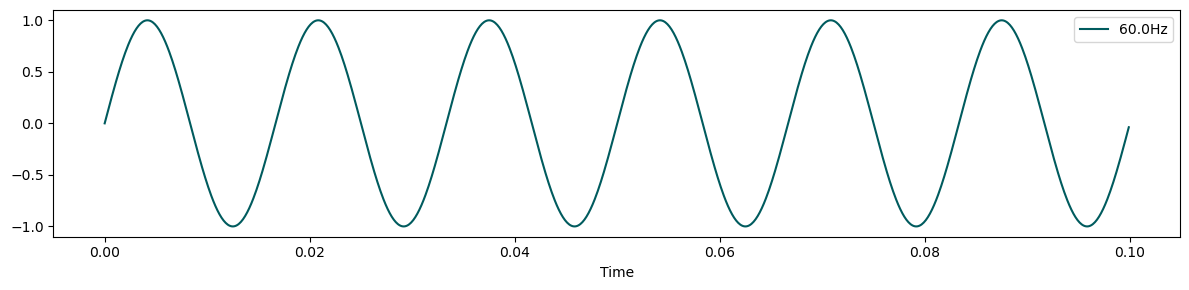

In [44]:
# Plot for wave.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot wave.
ax.plot(t, f_1, label=f'{freq_1}Hz', color=atu_colours['green'])

# Set x label.
ax.set_xlabel('Time')

# Legend.
ax.legend()

# File name.
filename = f'{freq_1}hz_signal'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

In [45]:
# Frequency of wave.
freq_2 = 150.0

# Generate wave.
f_2 = np.sin(2.0 * np.pi * freq_2 * t)

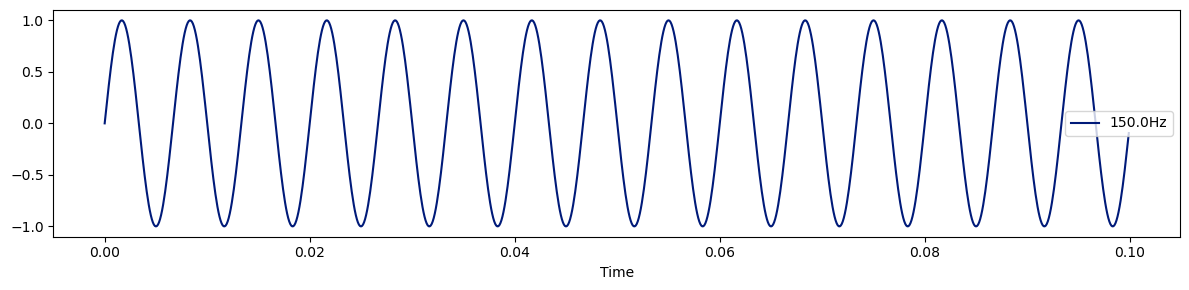

In [46]:
# Plot for wave.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot wave.
ax.plot(t, f_2, label=f'{freq_2}Hz', color=atu_colours['navy'])

# Set x label.
ax.set_xlabel('Time')

# Legend.
ax.legend()

# File name.
filename = f'{freq_2}hz_signal'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

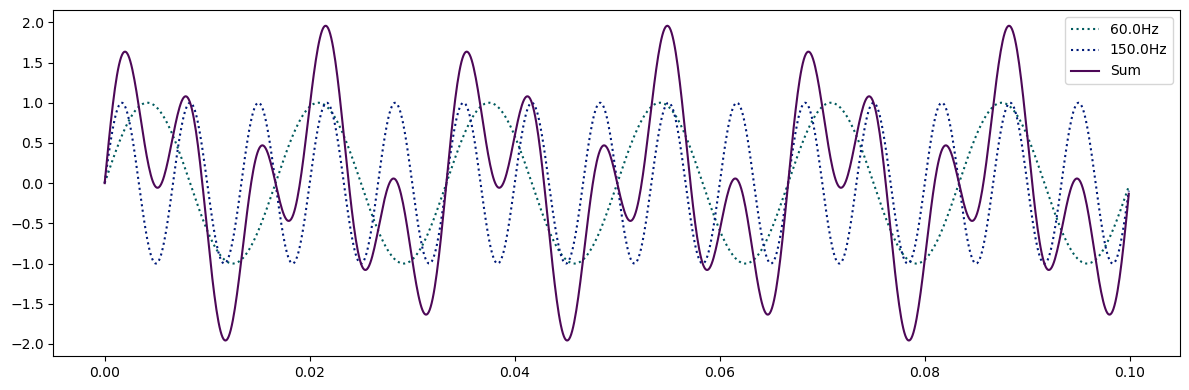

In [47]:
# Plot for both waves.
fig, ax = plt.subplots(figsize=(12,4))

# Plot first wave.
ax.plot(t, f_1, label=f'{freq_1}Hz', linestyle=':', color=atu_colours['green'])

# Plot second wave.
ax.plot(t, f_2, label=f'{freq_2}Hz', linestyle=':', color=atu_colours['navy'])

# Plot sum.
ax.plot(t, f_1 + f_2, label=f'Sum', color=atu_colours['purple'])

# Legend.
ax.legend()

# File name.
filename = f'sum_signal'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

## Waves All Together

***

In the following code, we can easily add more frequencies by just including more values in the freqs array.

In [48]:
# List of frequencies.
freqs = np.array([60, 150])

In [49]:
# Time step for discrete wave.
dt = 0.0004

# Array of time steps.
t = np.arange(0.0, 0.5, dt)

# Waves, one per row.
f = np.sin(2.0 * np.pi * np.reshape(freqs, (-1, 1)) * t)

# Print some values from the array.
print(f)

# Print the array shape.
print(f'Shape: {f.shape}')

[[ 0.          0.15022559  0.29704158 ... -0.43711577 -0.29704158
  -0.15022559]
 [ 0.          0.36812455  0.68454711 ... -0.90482705 -0.68454711
  -0.36812455]]
Shape: (2, 1250)


In [50]:
# Create list of colours to use.
colors = list(atu_colours.values())

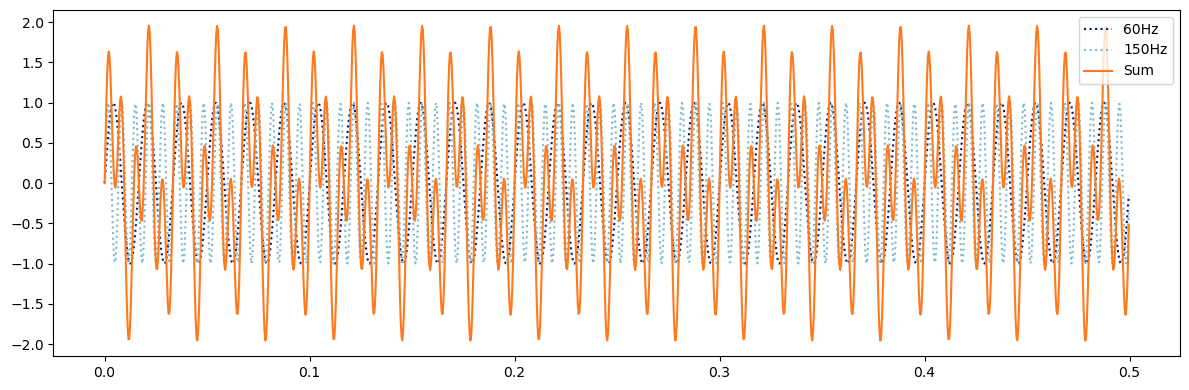

In [51]:
# Figure for all of the individual waves.
fig, ax = plt.subplots(figsize=(12, 4))

for i in range(len(freqs)):  
  # Plot individual waves.
  ax.plot(t, f[i], label=f'{freqs[i]}Hz', color=colors[i % len(colors)], linestyle=':')

# Plot the sum.
ax.plot(t, f.sum(axis=0), label='Sum', color=atu_colours['orange'])

# Legend.
ax.legend()

# File name.
filename = f'sum_with_sines'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

## Noise

***

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal

In [52]:
# Create some random noise.
noise = np.random.normal(0.0, 2.5, t.shape)

# Show the noise.
noise

array([-1.45557802,  1.79061536, -4.09032338, ...,  1.52333044,
       -0.5483202 ,  1.90321023])

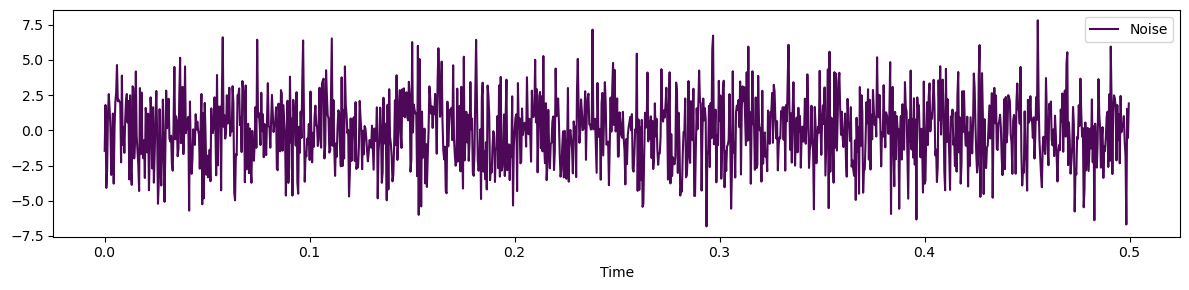

In [53]:
# Plot for noise.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot wave.
ax.plot(t, noise, label='Noise', color=atu_colours['purple'])

# Set x label.
ax.set_xlabel('Time')

# Legend.
ax.legend()

# File name.
filename = f'noise'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

In [54]:
# Signal.
signal = f.sum(axis=0)

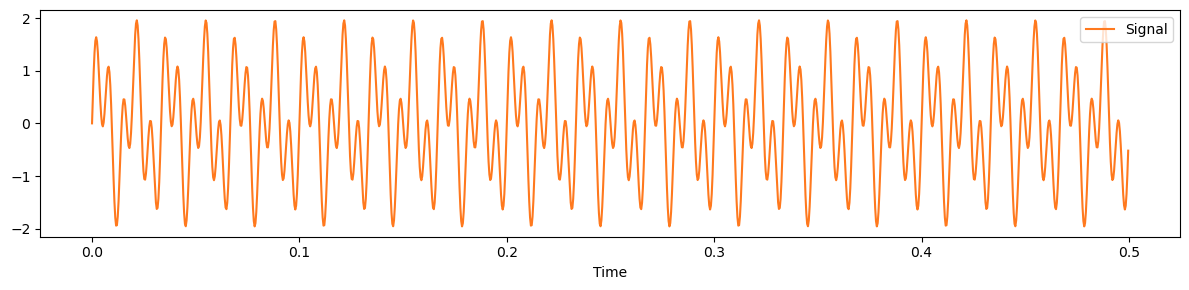

In [55]:
# Plot for signal.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot wave.
ax.plot(t, signal, label='Signal', color=atu_colours['orange'])

# Set x label.
ax.set_xlabel('Time')

# Legend.
ax.legend()

# File name.
filename = f'signal'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

In [56]:
# Noisy signal.
noisy_signal = signal + noise

# Show.
noisy_signal

array([-1.45557802,  2.3089655 , -3.10873469, ...,  0.18138762,
       -1.52990889,  1.38486009])

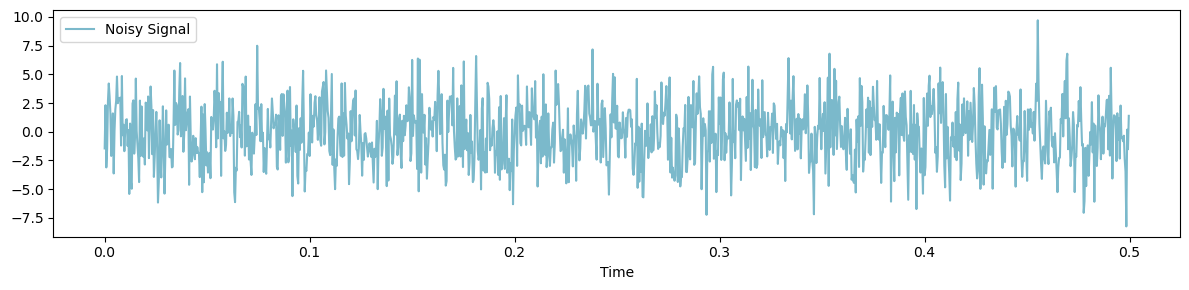

In [57]:
# Plot for noisy signal.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot wave.
ax.plot(t, noisy_signal, label='Noisy Signal', color=atu_colours['teal'])

# Set x label.
ax.set_xlabel('Time')

# Legend.
ax.legend()

# File name.
filename = f'noisy_signal'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

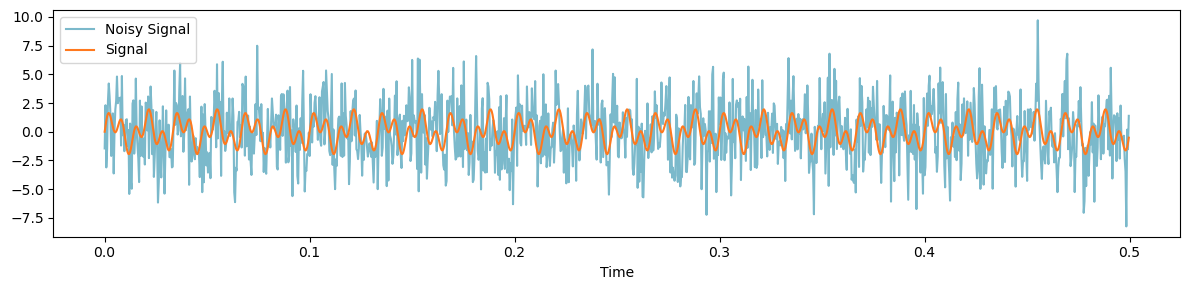

In [58]:
# Plot for signal and noisy signal.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot noisy signal.
ax.plot(t, noisy_signal, label='Noisy Signal', color=atu_colours['teal'])

# Plot signal.
ax.plot(t, signal, label='Signal', color=atu_colours['orange'])

# Set x label.
ax.set_xlabel('Time')

# Legend.
ax.legend()

# File name.
filename = f'signal_and_noise'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

## Fast Fourier Transform

***

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

In [59]:
# Fourier Transform.
F = np.fft.fft(noisy_signal)

In [60]:
# Frequency range.
freq_range = np.fft.fftfreq(t.shape[0], dt)

# Show.
freq_range

array([ 0.,  2.,  4., ..., -6., -4., -2.])

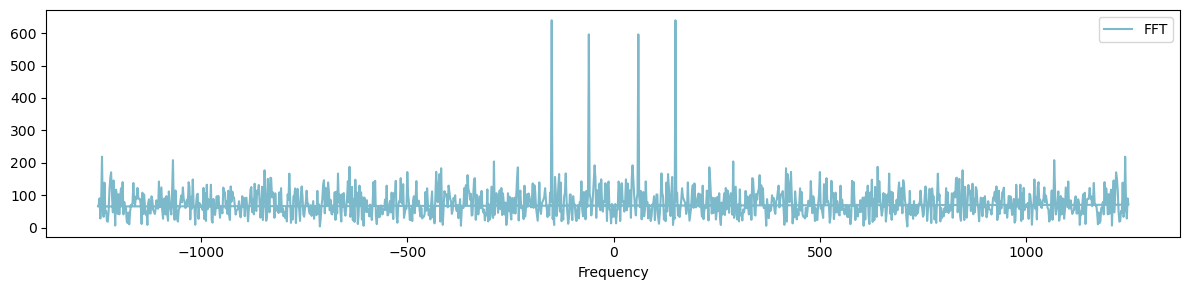

In [61]:
# Plot for signal and noisy signal.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot FFT of noisy_signal.
ax.plot(freq_range, np.abs(F), label='FFT', color=atu_colours['teal'])

# Set x label.
ax.set_xlabel('Frequency')

# Legend.
ax.legend()

# File name.
filename = f'fft_of_noisy_signal'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

In [62]:
# Note the near-horizontal line in the above is due to the jump to negative frequencies half-way.
freq_range[620:640]

array([ 1240.,  1242.,  1244.,  1246.,  1248., -1250., -1248., -1246.,
       -1244., -1242., -1240., -1238., -1236., -1234., -1232., -1230.,
       -1228., -1226., -1224., -1222.])

## Noise Removal

***

See reference [5].

In [63]:
# Set a threshold amplitude for keeping frequencies.
amp = 250.0

# Magnitudes/Absolute values of F.
absF = np.abs(F)

# Find frequencies above this amplitude.
makescut = absF > amp

In [64]:
# Show the indices of the frequencies.
print(np.where(makescut))

# Show the frequencies - note the symmetry in the FFT.
freq_range[makescut]

(array([  30,   75, 1175, 1220]),)


array([  60.,  150., -150.,  -60.])

In [65]:
# Copy F to keep the original.1
Fcopy = F.copy()

# Zero the frequencies not making the threshold.
Fcopy[~makescut] = 0.0

# Show.
Fcopy

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

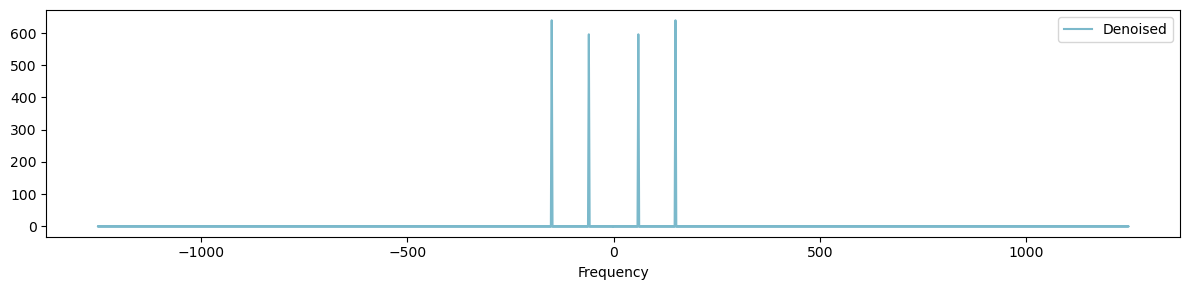

In [66]:
# Plot for signal and noisy signal.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot FFT of noisy_signal.
ax.plot(freq_range, np.abs(Fcopy), label='Denoised', color=atu_colours['teal'])

# Set x label.
ax.set_xlabel('Frequency')

# Legend.
ax.legend()

# File name.
filename = f'fft_denoised'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

In [67]:
# Inverse Fourier transform.
Finv = np.fft.ifft(Fcopy)

# Show
Finv

array([-0.12175158+9.09494702e-17j,  0.39810237+9.09494702e-17j,
        0.86422709+0.00000000e+00j, ..., -1.44998782+7.24880217e-17j,
       -1.09816213+9.90073681e-17j, -0.63921295+1.86807132e-16j])

In [68]:
# Check the imaginary parts are float-style zeros.
print(np.isclose(Finv.imag, 0.0).all())

# Disregard imaginary parts.
Finv = Finv.real

True


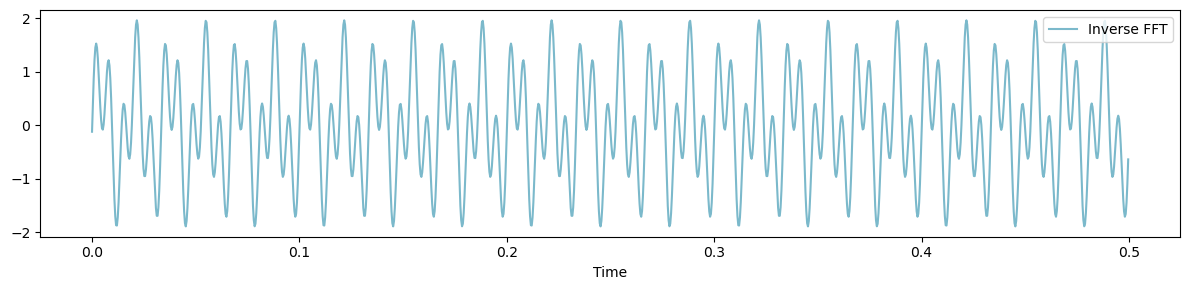

In [69]:
# Plot inverse FFT.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot inverse FFT.
ax.plot(t, Finv.real, label='Inverse FFT', color=atu_colours['teal'])

# Set x label.
ax.set_xlabel('Time')

# Legend.
ax.legend()

# File name.
filename = f'inverse_fft'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');


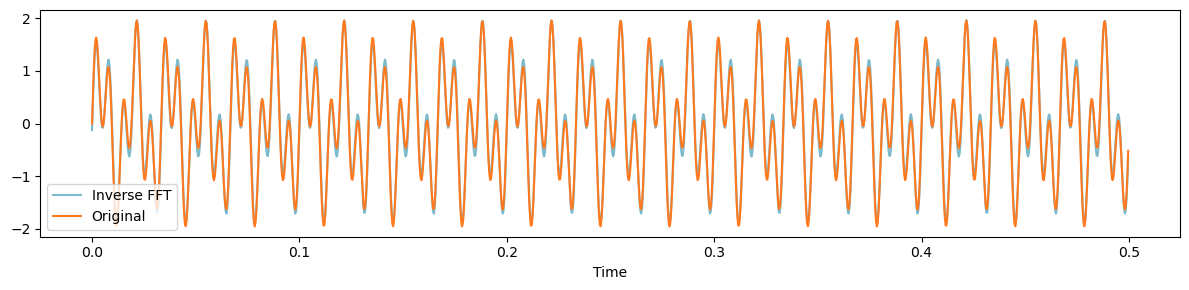

In [70]:
# Plot for signal and noisy signal.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot inverse FFT.
ax.plot(t, Finv, label='Inverse FFT', color=atu_colours['teal'])

# Plot original signal.
ax.plot(t, f.sum(axis=0), label='Original', color=atu_colours['orange'])

# Set x label.
ax.set_xlabel('Time')

# Legend.
ax.legend()

# File name.
filename = f'inverse_fft_with_original'

# Increase plot number.
plot_no = plot_no + 1

# Fix the layout, for some reason: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py
plt.tight_layout()

# Save png.
fig.savefig(f'img/{plot_no:02}_{filename}.png', format='png')

# Save pgf.
fig.savefig(f'img/{plot_no:02}_{filename}.pgf', format='pgf');

***

## End